In [1]:
import os
import cv2
import PIL
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix
from tensorflow.keras.models import Sequential, load_model, model_from_json


2023-06-18 09:23:23.438267: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-18 09:23:23.476233: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-18 09:23:23.477256: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-18 09:23:24.195916: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
img1 =image.load_img('train/AppleBlackrot/AppleBlackRot(1).JPG')

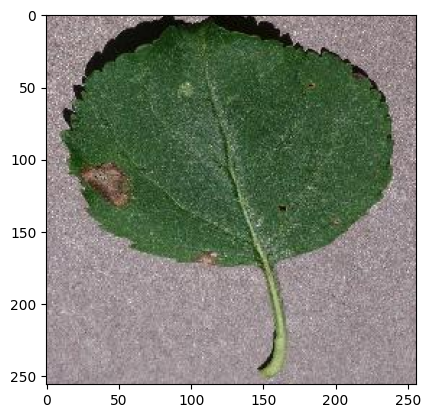

In [3]:
plt.imshow(img1)

In [4]:
cv2.imread('train/AppleBlackrot/AppleBlackRot(10).JPG').shape

(256, 256, 3)

In [5]:
train_dir ='train'
test_dir = 'valid'
IMG_SIZE = (256, 256)
BATCH_SIZE = 16

In [6]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3
    )
val_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3
    ) 

In [7]:
train_set = train_gen.flow_from_directory(
    'train/',
    subset = 'training',
    class_mode = 'categorical',
    target_size = IMG_SIZE,
    batch_size = 8
)


Found 9137 images belonging to 4 classes.


In [8]:
val_set = val_gen.flow_from_directory(
  'valid',
   subset = 'validation',
   class_mode = 'categorical',
   target_size = IMG_SIZE,
   batch_size = 8
   )

Found 42 images belonging to 4 classes.


In [9]:
train_set.classes

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [10]:
train_set.class_indices

{'AppleBlackrot': 0, 'AppleHealthy': 1, 'AppleScab': 2, 'Cedarapplerust': 3}

In [11]:
model = tf.keras.models.Sequential([
        
        layers.InputLayer(input_shape=(256, 256, 3)),
    
        layers.Conv2D( 32, 3,padding='valid', activation='relu'),
        
        layers.MaxPooling2D(pool_size=(2,2)),
        #  #########
        
        layers.Conv2D( 64, 3,padding='valid', activation='relu'),
        
        layers.MaxPooling2D(pool_size=(2,2)),
        #  #########
        
        layers.Conv2D( 64, 3,padding='valid', activation='relu'),
        
        layers.MaxPooling2D(pool_size=(2,2)),
        #  #########
        
        layers.Conv2D( 64, 3,padding='valid', activation='relu'),
        
        layers.MaxPooling2D(pool_size=(2,2)),
        #  #########
        
        layers.Conv2D( 64, 3,padding='valid', activation='relu'),
        
        layers.MaxPooling2D(pool_size=(2,2)),
        # ##########
        
        layers.Flatten(),
        
        layers.Dense(64, activation='relu'),
        
        layers.Dense(4, activation='softmax')
        ])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [13]:
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    metrics=['accuracy']
    )
final_model = model.fit(
     train_set,
     epochs=15,
     validation_data=val_set, 
     steps_per_epoch = len(train_set),
     validation_steps = len(val_set)
     )

Epoch 1/15


2023-06-18 09:39:48.039371: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1143/1143 [==============================] - 297s 259ms/step - loss: 0.1687 - accuracy: 0.9397 - val_loss: 1.0241 - val_accuracy: 0.7619
Epoch 2/15
1143/1143 [==============================] - 311s 272ms/step - loss: 0.1161 - accuracy: 0.9607 - val_loss: 0.6868 - val_accuracy: 0.8571
Epoch 3/15
1143/1143 [==============================] - 295s 258ms/step - loss: 0.0650 - accuracy: 0.9778 - val_loss: 0.6540 - val_accuracy: 0.8810
Epoch 4/15
1143/1143 [==============================] - 285s 250ms/step - loss: 0.0565 - accuracy: 0.9813 - val_loss: 0.7284 - val_accuracy: 0.8810
Epoch 5/15
1143/1143 [==============================] - 291s 254ms/step - loss: 0.0570 - accuracy: 0.9802 - val_loss: 0.6336 - val_accuracy: 0.8095
Epoch 6/15
1143/1143 [==============================] - 284s 249ms/step - loss: 0.0476 - accuracy: 0.9826 - val_loss: 1.1167 - val_accuracy: 0.8571
Epoch 7/15
1143/1143 [==============================] - 290s 254ms/step - loss: 0.0411 - accuracy: 0.9859 - val_loss: 0.997

In [14]:
test_gen = ImageDataGenerator(rescale=1./255)

In [15]:
test_set = test_gen.flow_from_directory(
    'valid',
    class_mode = 'categorical',
    target_size = IMG_SIZE,
    batch_size = 8
)

Found 147 images belonging to 4 classes.


In [16]:
final_model.params

{'verbose': 1, 'epochs': 15, 'steps': 1143}

In [17]:
final_model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

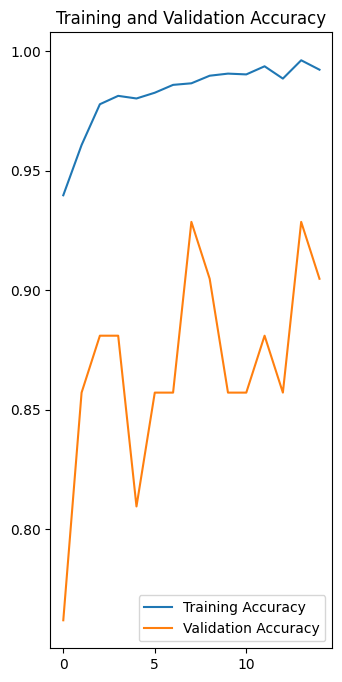

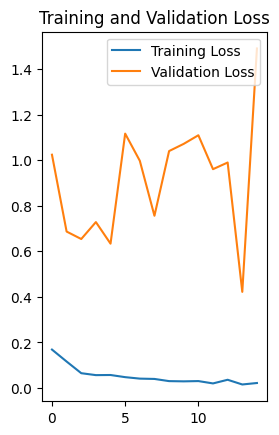

In [18]:
acc = final_model.history['accuracy']
val_acc = final_model.history['val_accuracy']

loss = final_model.history['loss']
val_loss = final_model.history['val_loss']
# plot the accuracy and loss
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(15), acc, label='Training Accuracy')
plt.plot(range(15), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()
# plt.savefig('AccVal_acc')

plt.subplot(1, 2, 2)
plt.plot(range(15), loss, label='Training Loss')
plt.plot(range(15), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
# plt.savefig('LossVal_loss')

In [19]:
model.save('Balanced_Aplle_Disease_Detection.h5')

In [20]:
def predict(model, images):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = test_set.classes[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)

    return predicted_class, confidence


In [21]:
scores = model.evaluate(test_set, batch_size=32, verbose=2)

2023-06-18 10:52:45.804358: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


19/19 - 1s - loss: 0.7067 - accuracy: 0.9388 - 1s/epoch - 70ms/step
